In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *
from scipy.stats import norm

np.set_printoptions(formatter={'float': lambda x: '{:8.2f}'.format(x)})

In [2]:
# a) 
def BSP(S, K, r, T, sigma):
    d2 = (np.log(S/K)+(r-(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d1 = d2 + sigma*np.sqrt(T)
    c = norm.cdf(d1)*S - norm.cdf(d2)*K*np.exp(-r*T)
    return c

In [3]:
# b) 
def EuroBound(S, K, r, T, sigma, TD, D_size):
    D_PV = D_size*S
    Bound = max(BSP(S, K, r, TD, sigma), BSP(S-D_PV, K, r, T, sigma))
    return Bound

In [4]:
# c)
def RiskNeutral_P(S, r, T, sigma, N):
    X = np.random.normal(0,1,N)
    ST = S*np.exp((r-sigma**2/2)*T + (sigma*np.sqrt(T))*X)
    return ST

In [5]:
# d)
def MC_EuroCall(S, K, r, T, sigma, N):
    nPrice = RiskNeutral_P(S, r, T, sigma, N)
    nPayoff = []
    for s in nPrice:
        nPayoff.append(max(s-K, 0))
    call = (np.array(nPayoff).mean())*np.exp(-r*T)
    return call

In [6]:
# e)
def MC_AmerCall(S, K, r, T, sigma, TD, D_size, N):
    CumDiv_P = RiskNeutral_P(S, r, TD, sigma, N)
    Early = []
    for s in CumDiv_P:
        Early.append(max(s-K, 0))
    D = D_size*CumDiv_P
    ExDiv_P = CumDiv_P - D
    Late = []
    for s in ExDiv_P:
        Late.append(BSP(s, K, r, T, sigma))
    
    payoff_TD = [max(value) for value in zip(Early, Late)]
    call = (np.array(payoff_TD).mean())*np.exp(-r*TD)
    return call

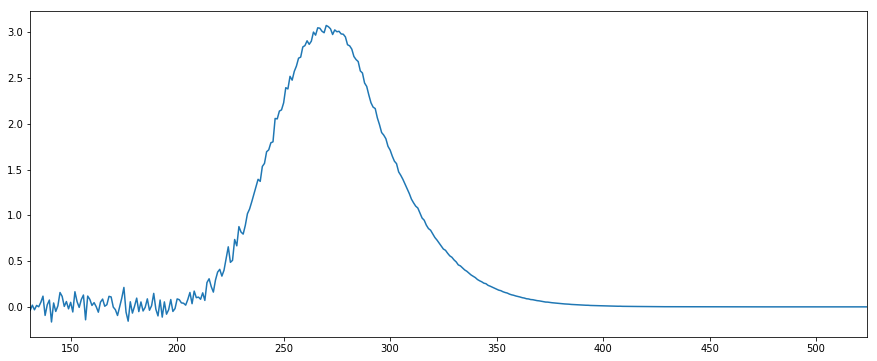

In [7]:
AAPL_EuroBound = []
for k in np.arange(262/2, 262*2+1, 1):
    AAPL_EuroBound.append(EuroBound(262, k, 0.0178, 1/4, 0.2213, 1/6, 0.03))

AAPL_AmerCall = []
for k in np.arange(262/2, 262*2+1, 1):
    AAPL_AmerCall.append(MC_AmerCall(262, k, 0.0178, 1/4, 0.2213, 1/6, 0.03, 100000))

AAPL = pd.DataFrame({"Euro bound": np.array(AAPL_EuroBound),
                     "American call": np.array(AAPL_AmerCall), 
                     "Difference": np.array(AAPL_AmerCall)-np.array(AAPL_EuroBound)}, 
                     index = list(np.arange(262/2, 262*2+1, 1)))

AAPL.iloc[:, 2].plot(figsize = (15, 6))